In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline
from plotly import tools
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.offline as offline
import squarify
import random
import operator
df=pd.read_csv('https://raw.githubusercontent.com/ArsalanKhan0608/UFC-Data-Analysis/main/data.csv')
df.head(2)

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
0,1,1,23.0,182.0,Trento Italy,2783,Mezzocorona Italy,Marvin Vettori,84,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
1,0,0,32.0,175.0,"Careiro da Várzea, Amazonas Brazil",2208,"Pharr, Texas USA",Carlos Diego Ferreira,70,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB,blue


In [67]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Columns: 895 entries, BPrev to winner
dtypes: float64(873), int64(13), object(9)
memory usage: 10.1+ MB


In [68]:
print("Number of Total fight Record ",df.shape[0])
print("Number of Blue Fighter ",len(df.B_ID.unique()))
print("Number of Red Fighter ",len(df.R_ID.unique()))


Number of Total fight Record  1477
Number of Blue Fighter  715
Number of Red Fighter  627


In [69]:
df['B_Age']=df['B_Age'].fillna(np.mean(df['B_Age']))
df['B_Height']=df['B_Height'].fillna(np.mean(df['B_Height']))
df['R_Age']=df['R_Age'].fillna(np.mean(df['R_Age']))
df['R_Height']=df['R_Height'].fillna(np.mean(df['R_Height']))

temp=df['winner'].value_counts()
fig={
    'data':[
        {
            'values':temp.values,
            'labels':temp.index,
            'domain':{'x':[0,1]},
            'hole':.6,
            'type':'pie'
        },
    ],
    'layout':{
        'title':'winner',
        'annotations':[
            {
                'font':{
                    'size':17
                    },
                    'showarrow':False,
                    'text':'who winning more',
                    'x':0.5,
                    'y':0.5
            }
        ]
    }

}
iplot(fig,filename='donut')

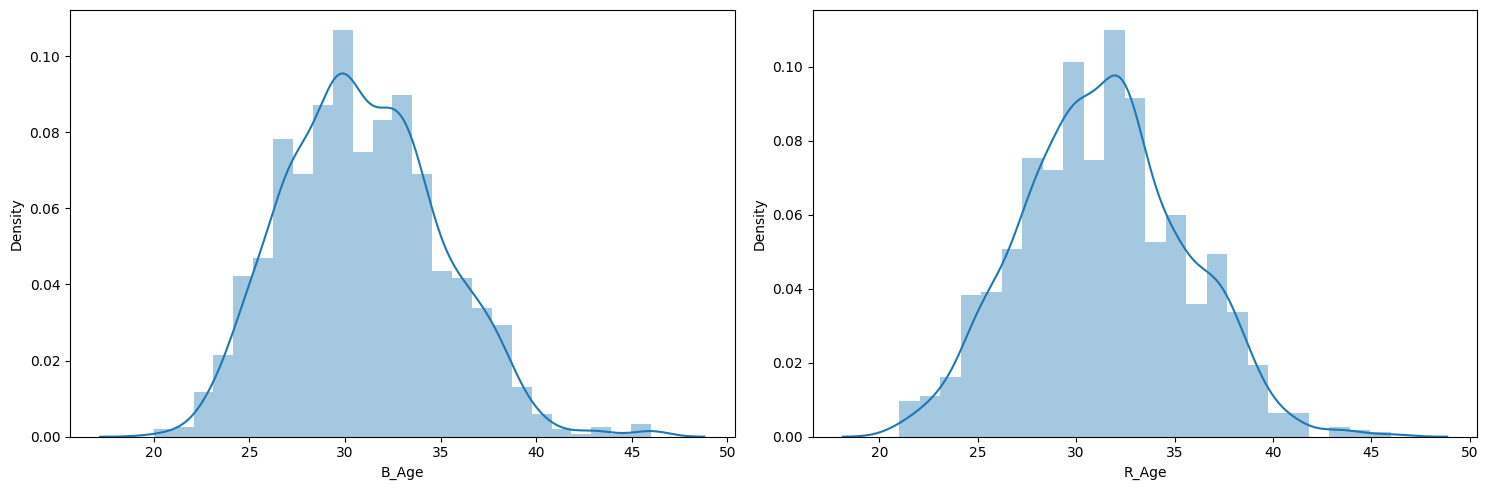

In [70]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(df.B_Age, ax=ax[0])
sns.distplot(df.R_Age, ax=ax[1])

# Alternatively, if you want KDE plots:
# sns.kdeplot(df.B_Age, ax=ax[0], shade=True)
# sns.kdeplot(df.R_Age, ax=ax[1], shade=True)

plt.tight_layout()
plt.show()

In [71]:
BAge=df.groupby(['B_Age']).count()['winner']
BlueAge=BAge.sort_values(axis=0,ascending=False)
BlueAge.head(10)

B_Age
30.0    164
33.0    138
29.0    134
32.0    128
27.0    120
31.0    112
28.0    106
34.0    106
26.0     72
35.0     67
Name: winner, dtype: int64

In [72]:
RAge=df.groupby(['R_Age']).count()['winner']
RlueAge=RAge.sort_values(axis=0,ascending=False)
RlueAge.head(10)

R_Age
32.0    169
30.0    156
33.0    141
28.0    116
31.0    114
29.0    111
35.0     92
34.0     81
27.0     78
37.0     76
Name: winner, dtype: int64

Text(0.5, 1.0, 'Age of the Red Fighter')

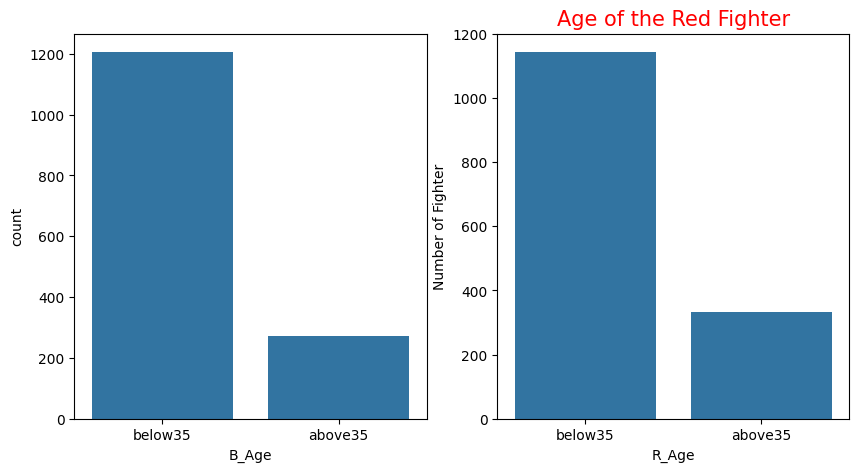

In [73]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
above35=['above35' if i>=35 else 'below35' for i in df.B_Age]
df_B=pd.DataFrame({'B_Age':above35})
sns.countplot(x=df_B.B_Age,ax=ax[0])
plt.ylabel('Number of Fighter')
plt.title('Age of the Blue Fighter', color='black',fontsize=15)


above35=['above35' if i>=35 else 'below35' for i in df.R_Age]
df_R=pd.DataFrame({'R_Age':above35})
sns.countplot(x=df_R.R_Age,ax=ax[1])
plt.ylabel('Number of Fighter')
plt.title('Age of the Red Fighter', color='red',fontsize=15)





In [74]:
df['Age_Difference']=df.B_Age-df.R_Age
df[['Age_Difference','winner']].groupby('winner').mean()

,Age_Difference
winner,
blue,-1.459711
draw,-1.555556
no contest,0.058824
red,0.273304


<Axes: xlabel='R_Height', ylabel='Density'>

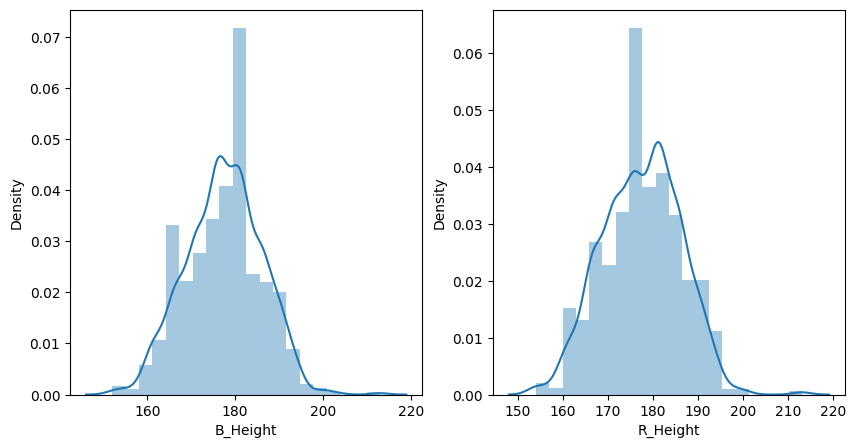

In [75]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.distplot(df.B_Height,bins=20,ax=ax[0])  
sns.distplot(df.R_Height,bins=20,ax=ax[1])

<Axes: xlabel='B_Height', ylabel='Density'>

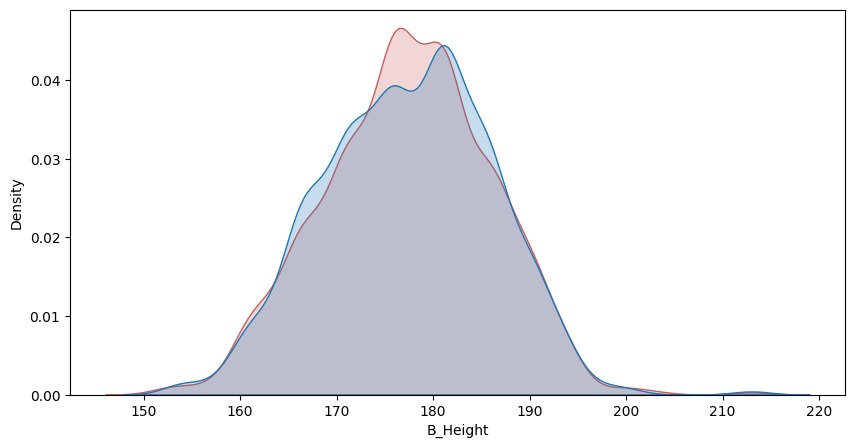

In [76]:
fig,ax=plt.subplots(figsize=(10,5))
sns.kdeplot(df.B_Height,shade=True,color='indianred',label='Red')
sns.kdeplot(df.R_Height,shade=True,label='Blue')

In [77]:
df['Height Difference']=df.B_Height-df.R_Height
df[['Height Difference','winner']].groupby('winner').mean()

,Height Difference
winner,
blue,0.118151
draw,2.444444
no contest,-1.411765
red,-0.052536


In [78]:


temp=df['winby'].value_counts()
fig={
    'data':[
        {
            'values':temp.values,
            'labels':temp.index,
            'domain':{'x':[0,1]},
            'hole':.6,
            'type':'pie'
        },
    ],
    'layout':{
        'title':'How the fighter are winning',
        'annotations':[
            {
                'font':{
                    'size':17
                    },
                    'showarrow':False,
                    'text':'WIN BY',
                    'x':0.5,
                    'y':0.5
            }
        ]
    }

}
iplot(fig,filename='donut')

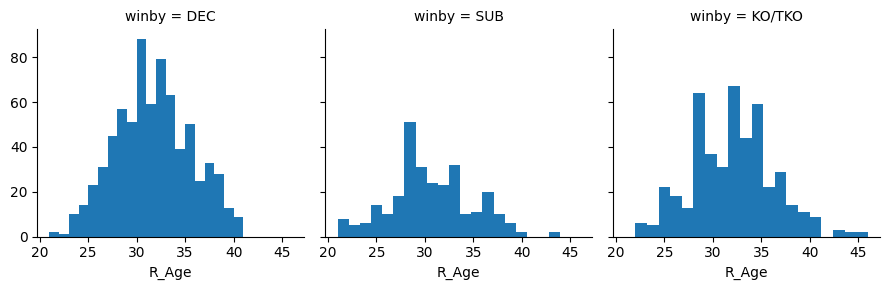

In [79]:
g=sns.FacetGrid(df,col='winby')
g.map(plt.hist,'R_Age',bins=20)

In [80]:
cnt_srs=df['R_Location'].value_counts().head(15)
cnt_srs

R_Location
Rio de Janeiro Brazil                    67
Montreal, Quebec Canada                  30
Coconut Creek, Florida United States     29
Denver, Colorado USA                     29
Coconut Creek, Florida USA               29
Las Vegas, Nevada USA                    24
Sao Paulo Brazil                         22
Albuquerque, New Mexico United States    21
Dublin Ireland                           19
Albuquerque, New Mexico USA              18
Sacramento, California USA               17
Chicago, Illinois USA                    15
San Jose, California USA                 14
Los Angeles, California USA              14
Boca Raton, Florida USA                  14
Name: count, dtype: int64

In [81]:
trace = go.Bar(x=cnt_srs.index, y=cnt_srs.values,
               marker=dict(color=cnt_srs.values))
layout = go.Layout(title='Most Popular Cities for Red Fighter')
data = [trace]
fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='Ratio')

In [82]:
cnt_srs=df['B_Location'].value_counts().head(15)
cnt_srs


B_Location
Rio de Janeiro Brazil                    38
Denver, Colorado USA                     27
Albuquerque, New Mexico USA              25
Coconut Creek, Florida USA               21
Sacramento, California USA               20
San Diego, California United States      19
Glendale, Arizona USA                    17
Las Vegas, Nevada USA                    16
Montreal, Quebec Canada                  16
Tokyo Japan                              15
Coconut Creek, FL USA                    15
Los Angeles, California USA              14
Fairfield, New Jersey USA                13
Albuquerque, New Mexico United States    13
Coconut Creek, Florida United States     12
Name: count, dtype: int64

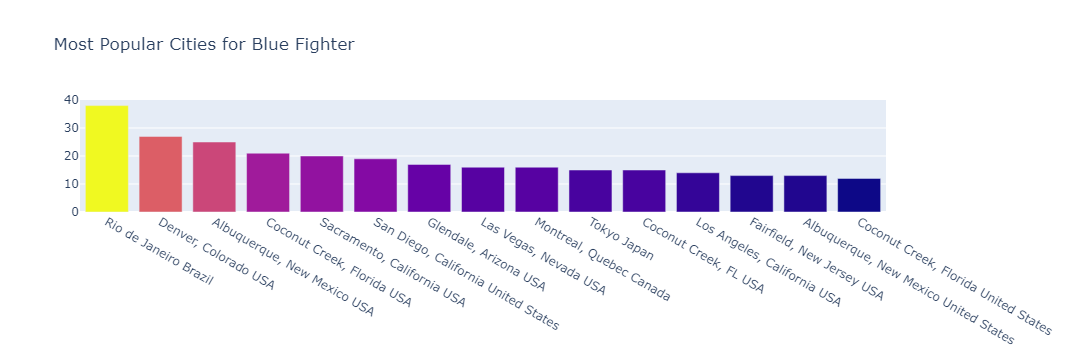

In [83]:
trace = go.Bar(x=cnt_srs.index, y=cnt_srs.values,
               marker=dict(color=cnt_srs.values))
layout = go.Layout(title='Most Popular Cities for Blue Fighter')
data = [trace]
fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='Ratio')

In [84]:
r1=df[['B_Weight','B__Round1_Grappling_Reversals_Landed', 'B__Round1_Grappling_Standups_Landed',
       'B__Round1_Grappling_Takedowns_Landed',]].groupby('B_Weight').sum()

In [35]:
df.columns


Index(['BPrev', 'BStreak', 'B_Age', 'B_Height', 'B_HomeTown', 'B_ID',
       'B_Location', 'B_Name', 'B_Weight',
       'B__Round1_Grappling_Reversals_Landed',
       ...
       'R__Round5_TIP_Half Guard Control Time',
       'R__Round5_TIP_Misc. Ground Control Time',
       'R__Round5_TIP_Mount Control Time', 'R__Round5_TIP_Neutral Time',
       'R__Round5_TIP_Side Control Time', 'R__Round5_TIP_Standing Time',
       'winby', 'winner', 'Age_Difference', 'Height Difference'],
      dtype='object', length=897)

In [37]:
type(r1)

pandas.core.frame.DataFrame

<Axes: xlabel='B_Weight'>

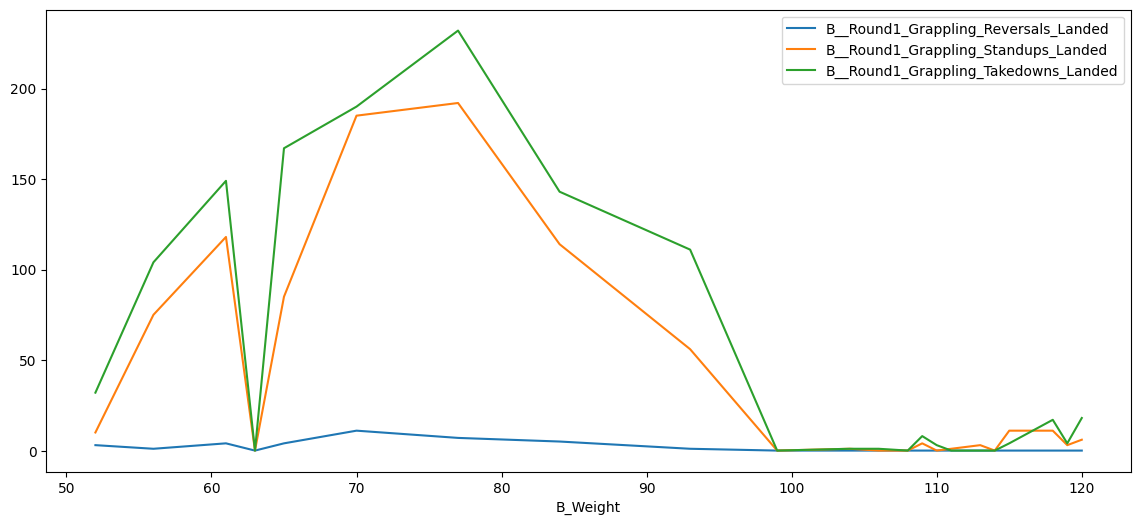

In [38]:
r1.plot(kind='line',figsize=(14,6))

In [85]:
r5=df[['B_Weight','B__Round5_Grappling_Reversals_Landed', 'B__Round5_Grappling_Standups_Landed',
       'B__Round5_Grappling_Takedowns_Landed',]].groupby('B_Weight').sum()

<Axes: xlabel='B_Weight'>

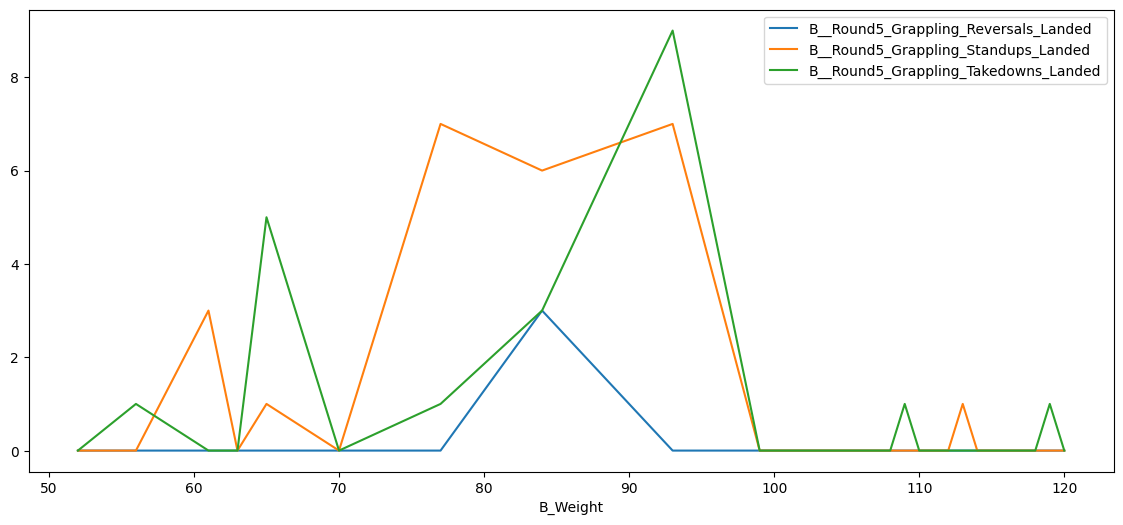

In [86]:
r5.plot(kind='line',figsize=(14,6))

In [87]:
r1=df[['R_Weight','R__Round1_Grappling_Reversals_Landed', 'R__Round1_Grappling_Standups_Landed',
       'R__Round1_Grappling_Takedowns_Landed',]].groupby('R_Weight').sum()

<Axes: xlabel='R_Weight'>

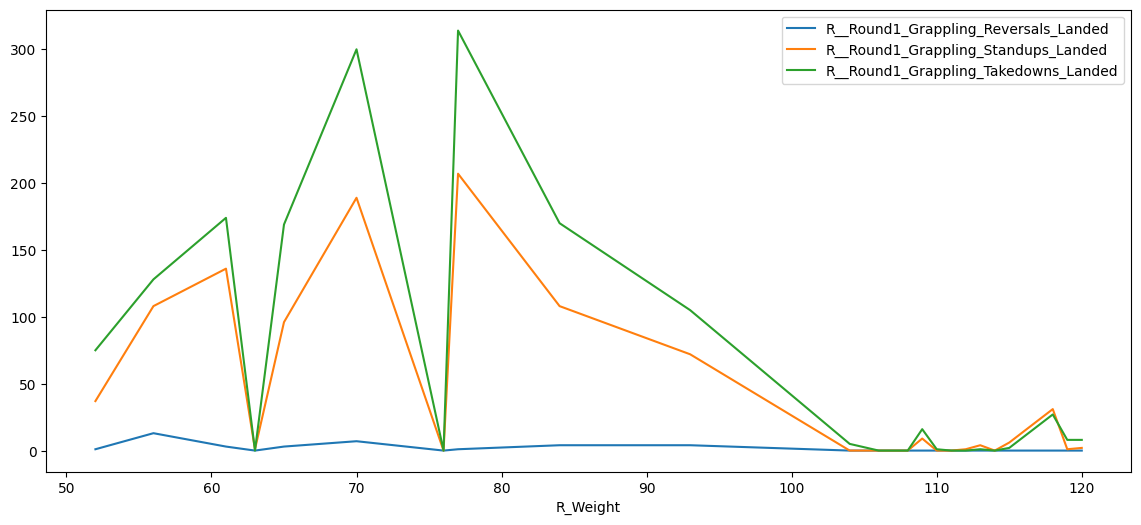

In [88]:
r1.plot(kind='line',figsize=(14,6))

In [89]:
r5=df[['R_Weight','R__Round5_Grappling_Reversals_Landed', 'R__Round5_Grappling_Standups_Landed',
       'R__Round5_Grappling_Takedowns_Landed',]].groupby('R_Weight').sum()

<Axes: xlabel='R_Weight'>

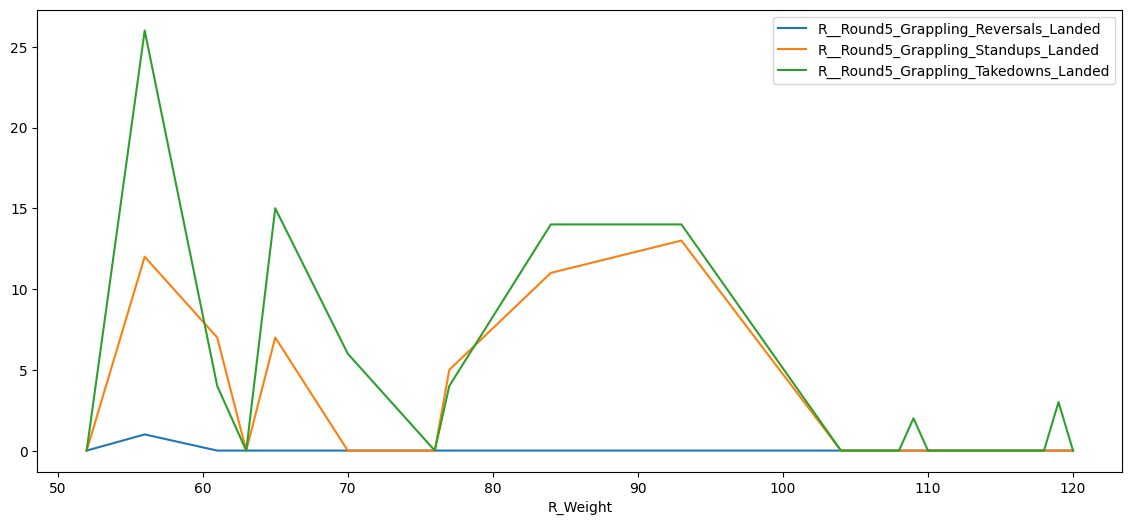

In [90]:
r5.plot(kind='line',figsize=(14,6))